In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# patching
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

# can now import files normally
pd.set_option("display.max_rows", 1000)


In [2]:
df_045 = pd.read_excel("../../data/ad8400/Характеристика_ad8400_045 (1).xlsx")

In [3]:
df_045

,code,resistance
0,0,42.79
1,1,49.49
2,2,53.39
3,3,58.39
4,4,62.30
5,5,67.39
6,6,71.49
7,7,76.49
8,8,80.49
9,9,85.39


In [4]:
df_020 = pd.read_excel("../../data/ad8400/Характеристика_ad8400_020 (1).xlsx")

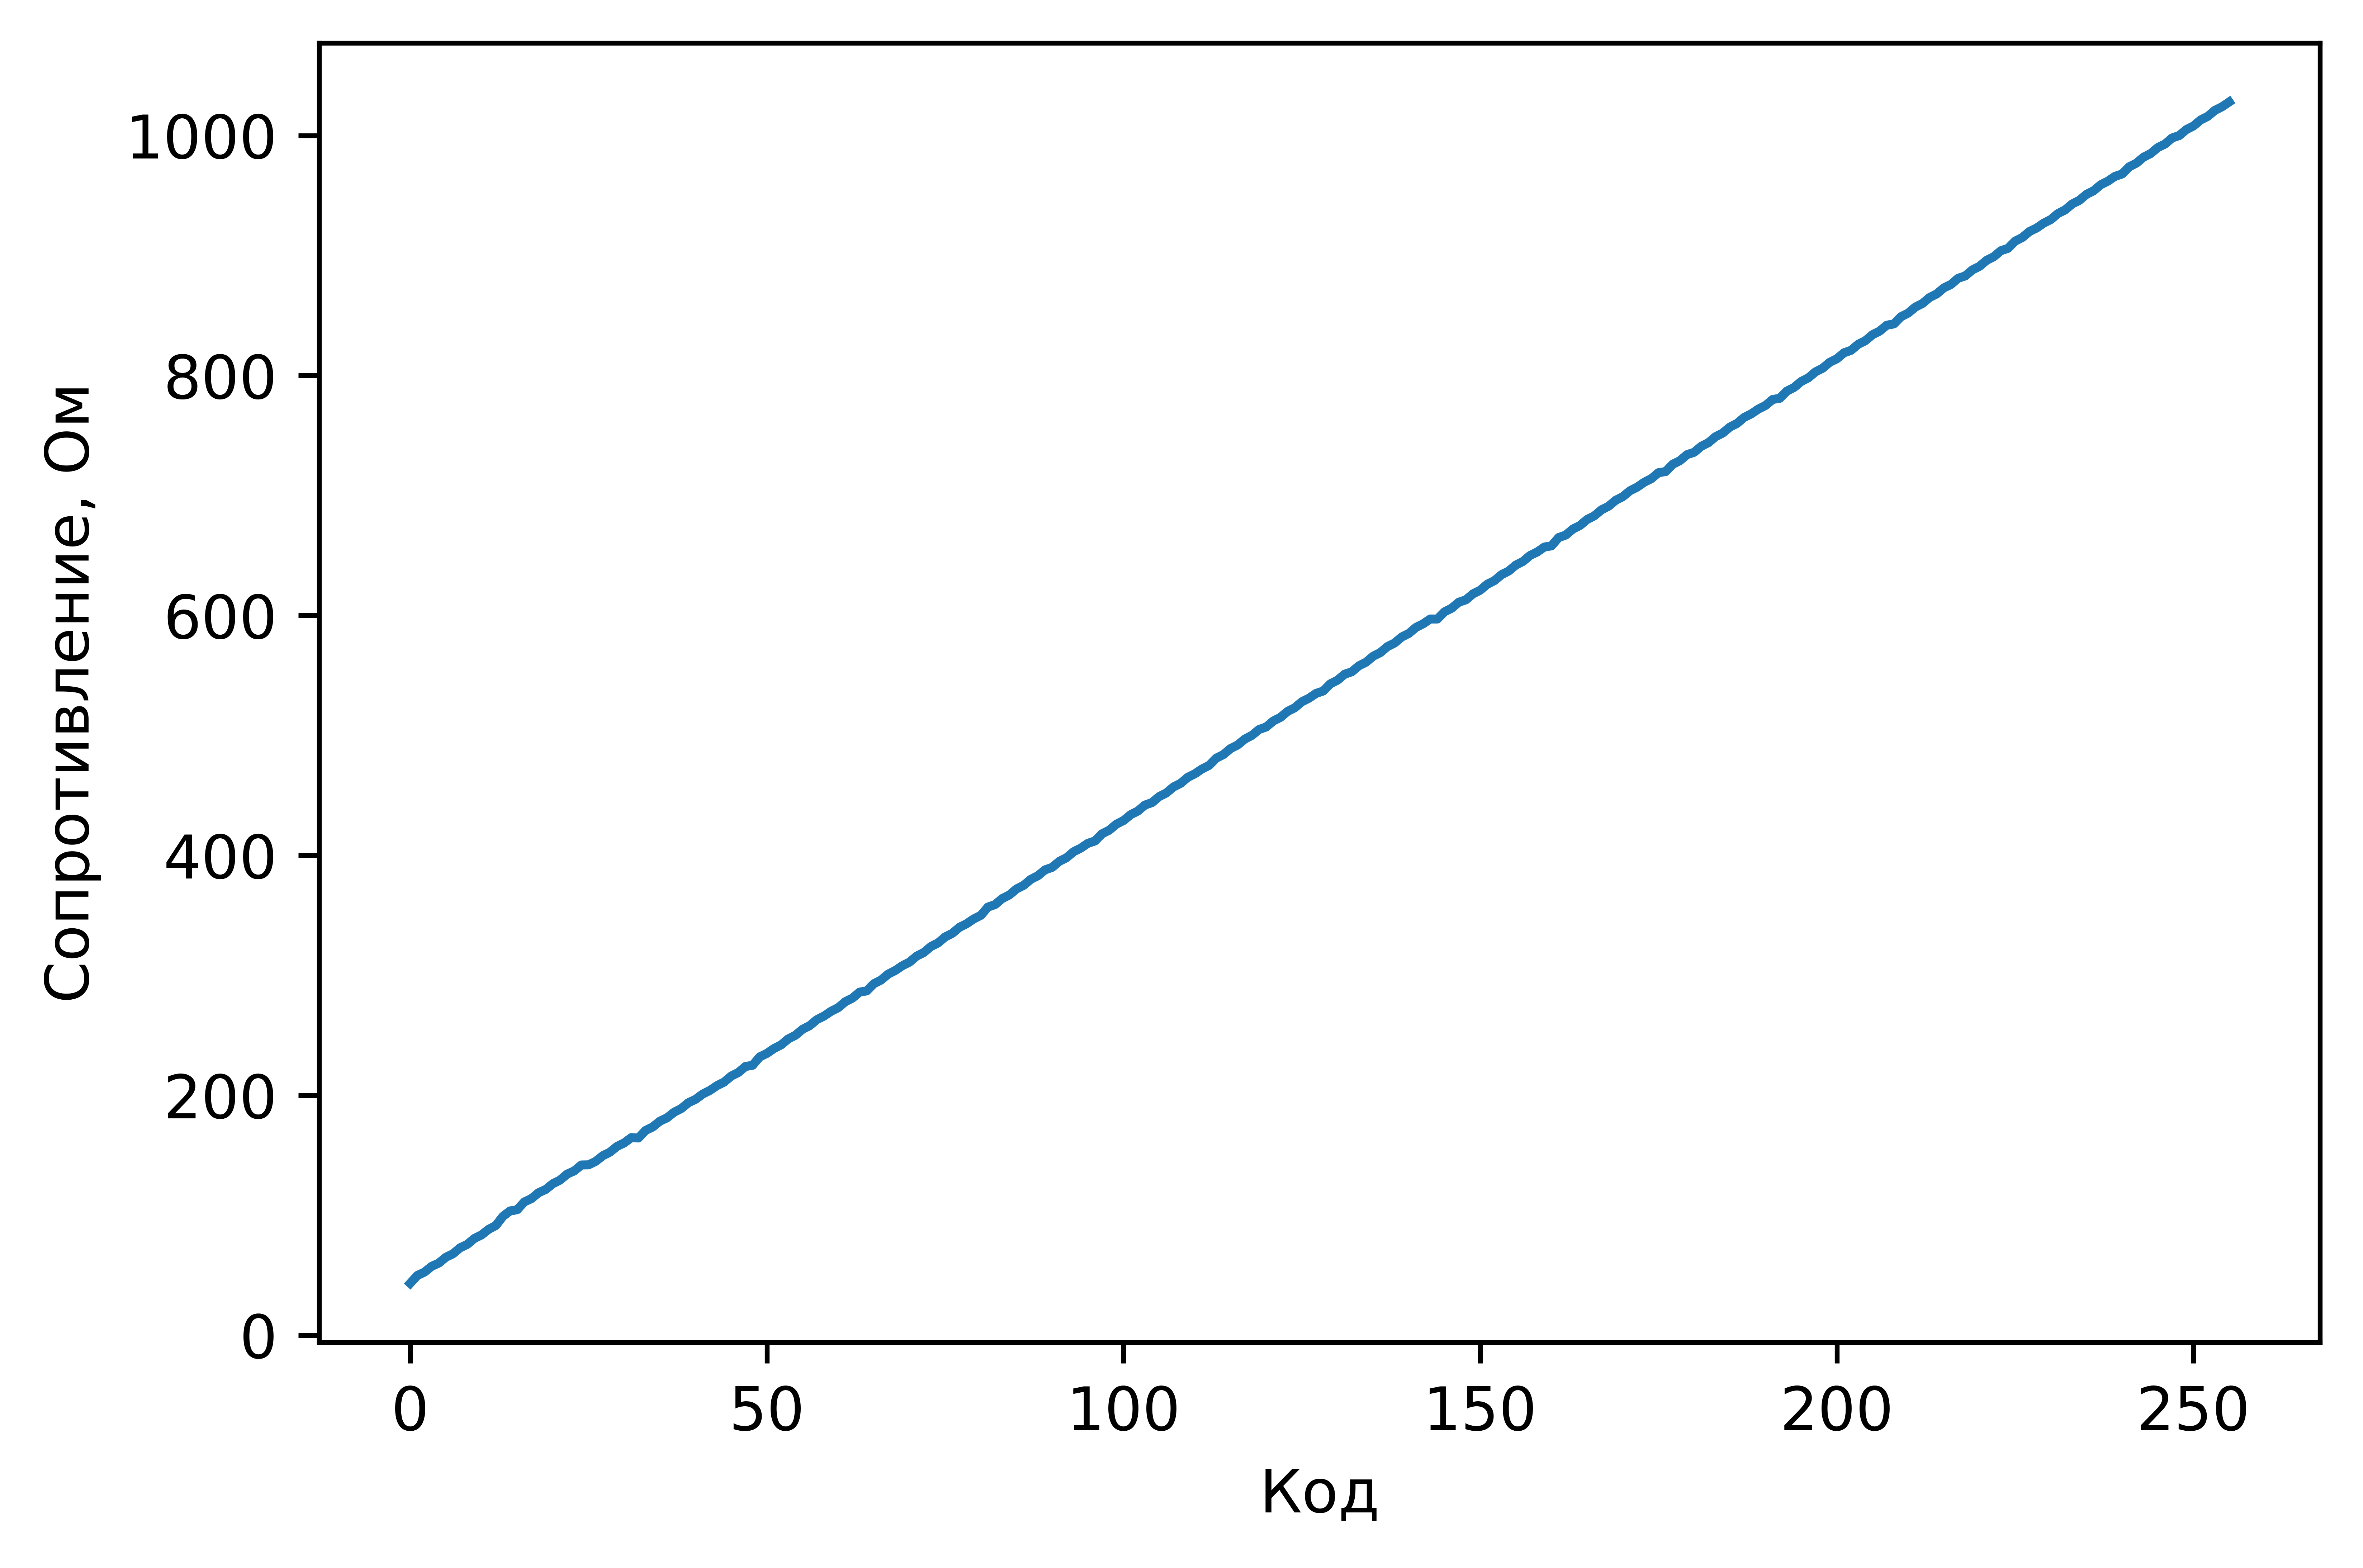

In [15]:
plt.figure(dpi=1200)
plt.xlabel("Код")
plt.ylabel("Сопротивление, Ом")
plt.plot(df_020["code"], df_020["resistance"], label="asdasd")

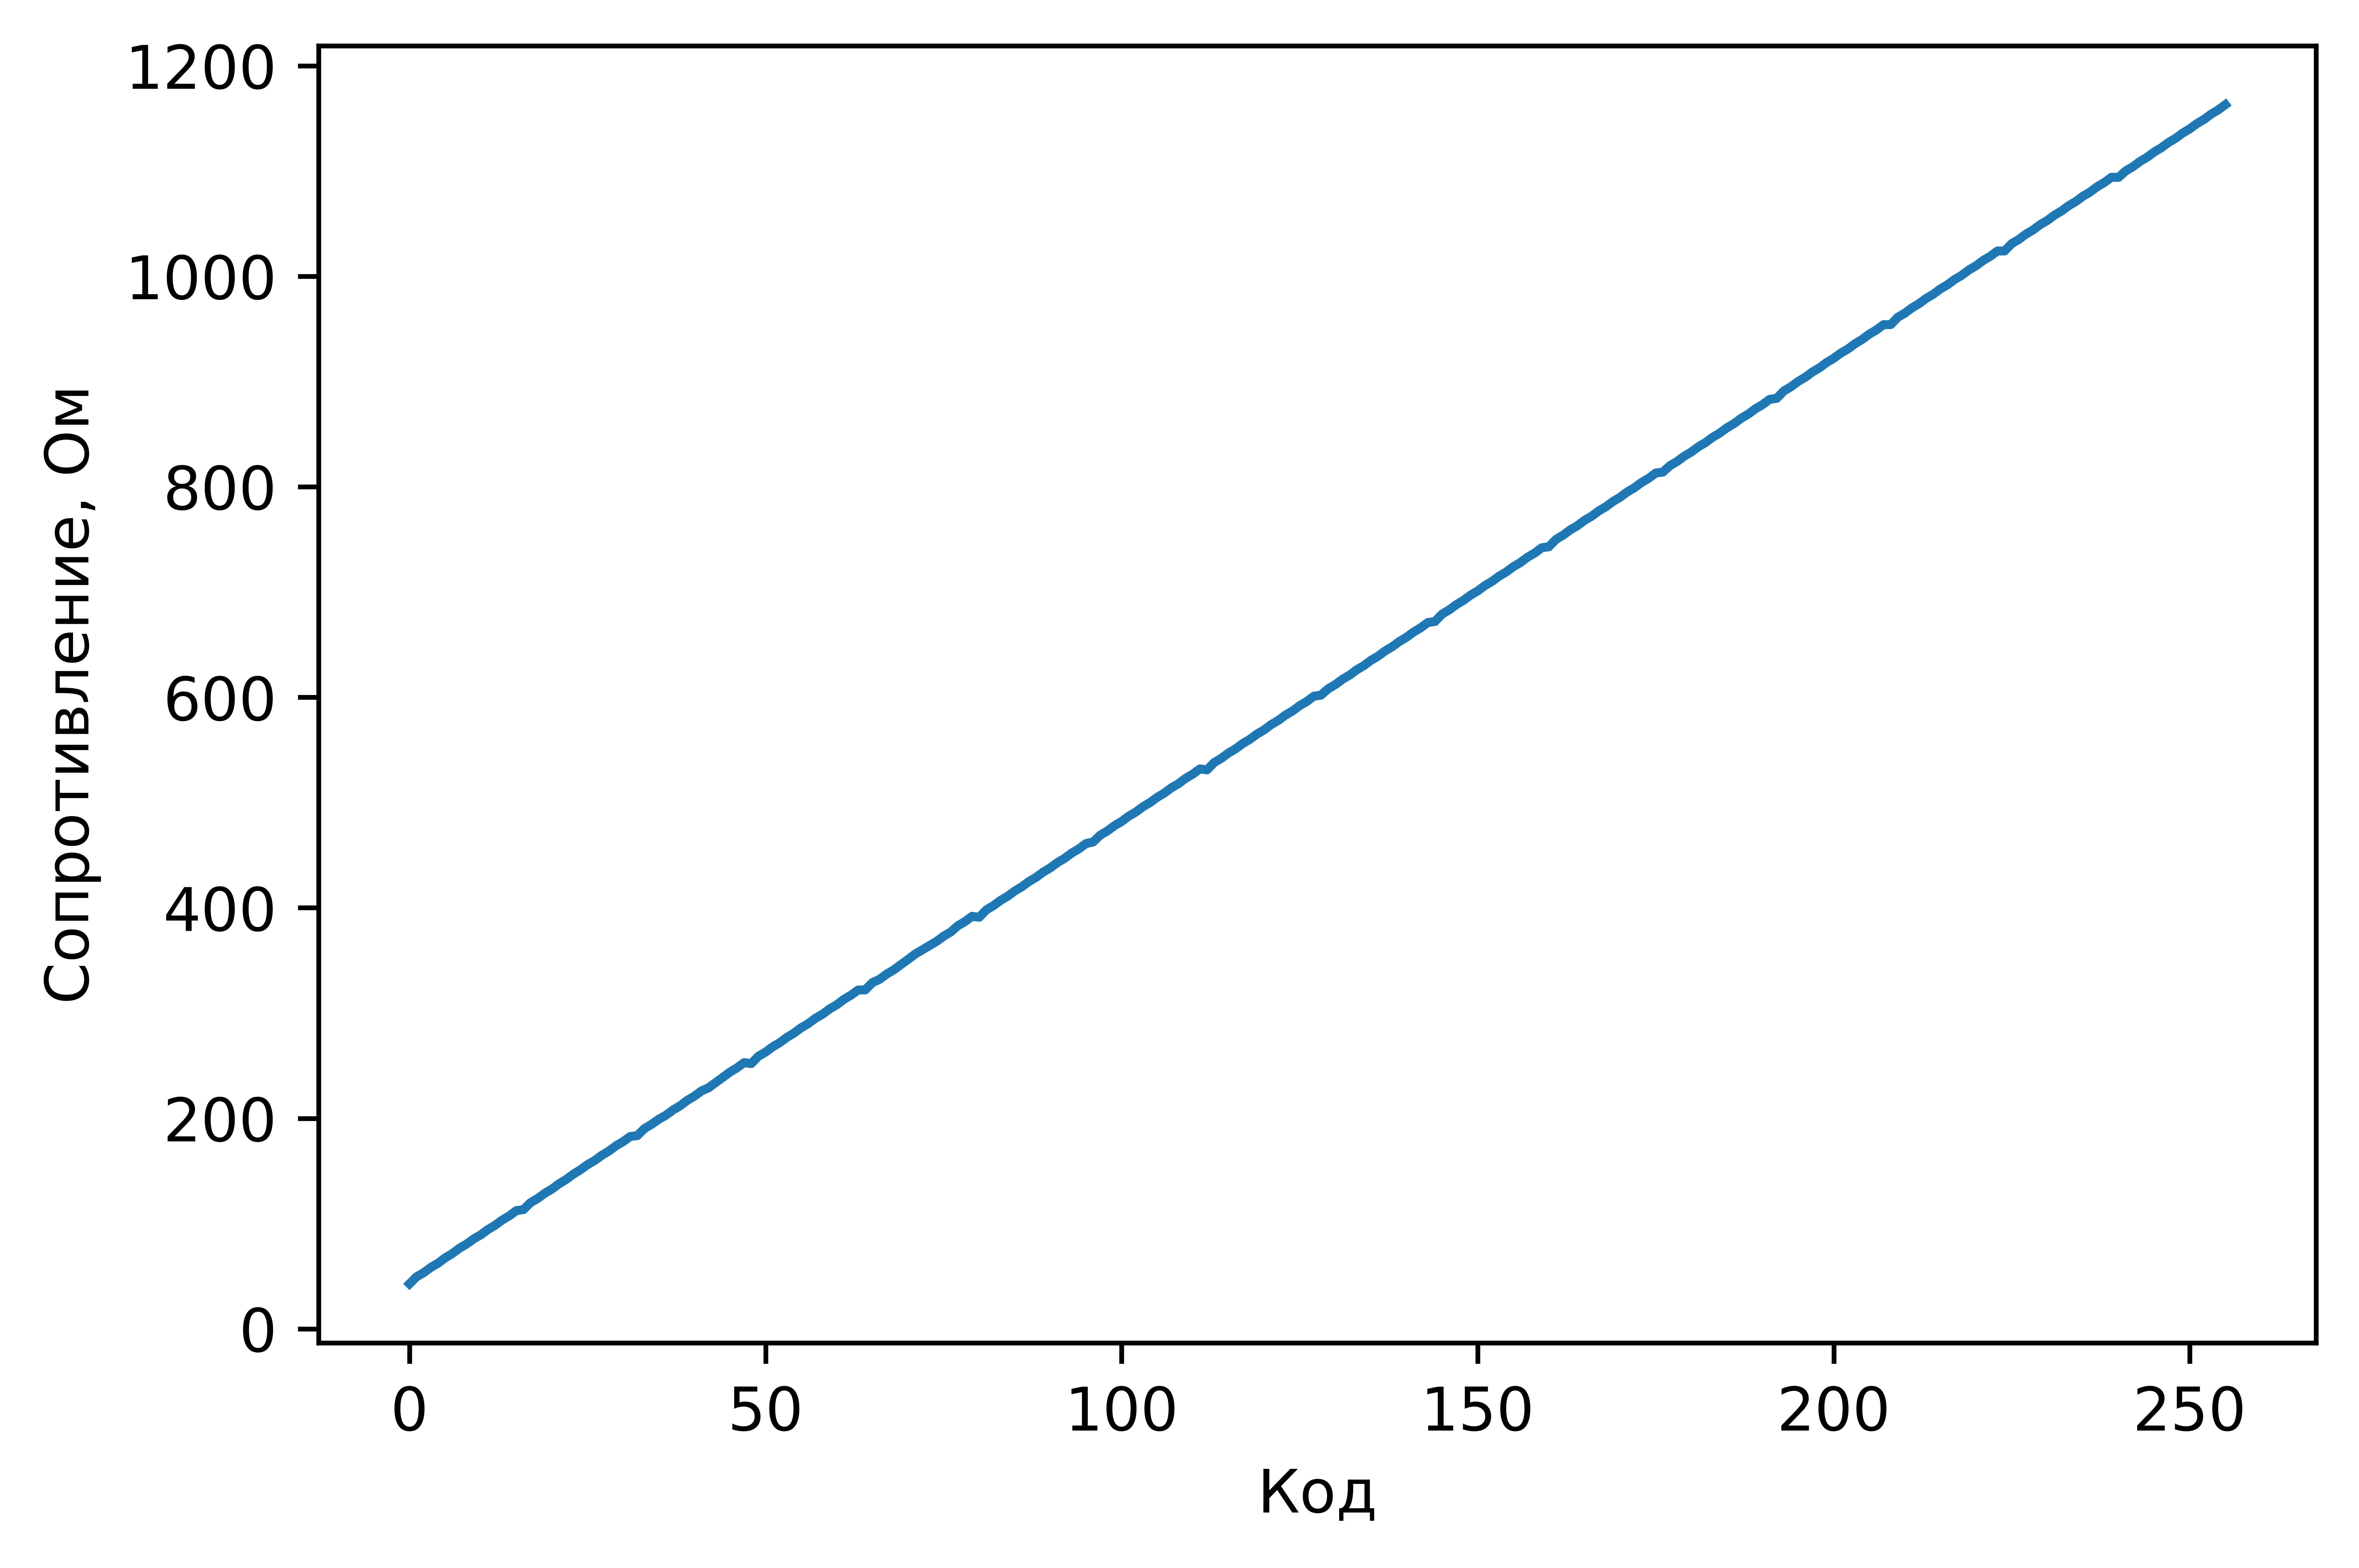

In [16]:
plt.figure(dpi=1200)
plt.xlabel("Код")
plt.ylabel("Сопротивление, Ом")
plt.plot(df_045["code"], df_045["resistance"])

In [31]:
resistances = []
r1_codes = []
r2_codes = []

for _, r1 in df_045.iterrows():
    for _, r2 in df_020.iterrows():
            resistance = round((r1["resistance"] * r2["resistance"]) / (r1["resistance"] + r2["resistance"]), 5)
            resistances.append(resistance)
            r1_code = int(r1["code"])
            r1_codes.append(r1_code)
            r2_code = int(r2["code"])
            r2_codes.append(r2_code)

resistances_df = pd.DataFrame(
    {
        "resistance": resistances,
        "r1_code": r1_codes,
        "r2_code": r2_codes,
    }
)

del resistances
del r1_codes
del r2_codes

In [32]:
resistances_df = df.sort_values(by=["resistance"])

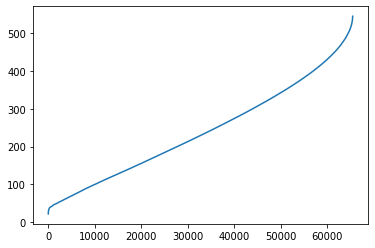

In [33]:
plt.plot(list(df["resistance"]))

In [45]:
from typing import Iterable
from numbers import Number
from utils.utils import find_nearest


def create_dataframe(
        path_to_resistance_thermometer,
        possible_values: pd.DataFrame,
        digipot1_data: pd.DataFrame,
        digipot2_data: pd.DataFrame,
) -> pd.DataFrame:
    df = pd.read_csv(path_to_resistance_thermometer)
    df["calc"] = df["R"].apply(lambda x: find_nearest(possible_values["resistance"], x))
    df["error"] = abs(df["R"] - df["calc"])
    df["R1_code"] = df["calc"].apply(lambda x: int(possible_values[possible_values["resistance"] == x].iloc[0]["r1_code"]))
    df["R2_code"] = df["calc"].apply(lambda x: int(possible_values[possible_values["resistance"] == x].iloc[0]["r2_code"]))
    df["R1"] = df["R1_code"].apply(lambda x: digipot1_data[digipot1_data["code"] == x].iloc[0]["resistance"])
    df["R2"] = df["R2_code"].apply(lambda x: digipot2_data[digipot2_data["code"] == x].iloc[0]["resistance"])
    return df

In [52]:
df_50m = create_dataframe("../../data/sensors_characteristics/50М.csv", resistances_df, df_045, df_020)

In [53]:
df_50m

,T,R,calc,error,R1_code,R2_code,R1,R2
0,-50,39.300,39.29435,5.650000e-03,0,113,42.79,481.00
1,-49,39.514,39.50743,6.570000e-03,0,122,42.79,515.00
2,-48,39.728,39.72240,5.600000e-03,100,0,482.00,43.29
3,-47,39.942,39.94127,7.300000e-04,7,10,76.49,83.59
4,-46,40.156,40.15470,1.300000e-03,12,6,98.29,67.89
5,-45,40.370,40.37059,5.900000e-04,0,174,42.79,714.00
6,-44,40.584,40.58344,5.600000e-04,0,193,42.79,787.00
7,-43,40.798,40.79696,1.040000e-03,0,216,42.79,875.90
8,-42,41.012,41.00852,3.480000e-03,0,244,42.79,985.00
9,-41,41.226,41.22676,7.600000e-04,187,0,865.00,43.29


In [54]:
df_50m["R1_code"].dtype

dtype('int64')

In [49]:
# resistances_df.to_csv("../../data/ad8400/parallel.csv", index=False)

In [55]:
df_50m

,T,R,calc,error,R1_code,R2_code,R1,R2
0,-50,39.300,39.29435,5.650000e-03,0,113,42.79,481.00
1,-49,39.514,39.50743,6.570000e-03,0,122,42.79,515.00
2,-48,39.728,39.72240,5.600000e-03,100,0,482.00,43.29
3,-47,39.942,39.94127,7.300000e-04,7,10,76.49,83.59
4,-46,40.156,40.15470,1.300000e-03,12,6,98.29,67.89
5,-45,40.370,40.37059,5.900000e-04,0,174,42.79,714.00
6,-44,40.584,40.58344,5.600000e-04,0,193,42.79,787.00
7,-43,40.798,40.79696,1.040000e-03,0,216,42.79,875.90
8,-42,41.012,41.00852,3.480000e-03,0,244,42.79,985.00
9,-41,41.226,41.22676,7.600000e-04,187,0,865.00,43.29
